In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [5]:
# Load the Instagram post data from local csv file
insta = pd.read_csv('instagram_like_data.csv')
insta

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [6]:
# Remove unnecessary columns
insta.drop(['Unnamed: 0', 'S.No'], axis=1, inplace=True)
insta

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [7]:
# rename columns for consistent formatting and readibility
insta.rename(columns = {'USERNAME':'Username', 'Time since posted':'Hours Since Posted'}, inplace=True)
insta

,Username,Caption,Followers,Hashtags,Hours Since Posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [8]:
# Remove the ' hours' text from the 'Hours Since Posted' column
insta['Hours Since Posted'] = insta['Hours Since Posted'].str.replace(' hours','')
insta['Hours Since Posted'] = insta['Hours Since Posted'].astype('int')
insta

,Username,Caption,Followers,Hashtags,Hours Since Posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222


In [9]:
insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Username            100 non-null    object
 1   Caption             94 non-null     object
 2   Followers           100 non-null    int64 
 3   Hashtags            100 non-null    object
 4   Hours Since Posted  100 non-null    int64 
 5   Likes               100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [10]:
insta.Caption.isnull().sum()

np.int64(6)

In [11]:
insta = insta.dropna()

In [12]:
insta.describe()

,Followers,Hours Since Posted,Likes
count,94.000000,94.000000,94.000000
mean,942.627660,3.521277,47.882979
std,1023.894946,3.488009,56.501757
min,11.000000,2.000000,8.000000
25%,231.000000,2.000000,19.000000
50%,593.500000,2.000000,29.500000
75%,1177.000000,3.000000,46.000000
max,4496.000000,24.000000,349.000000


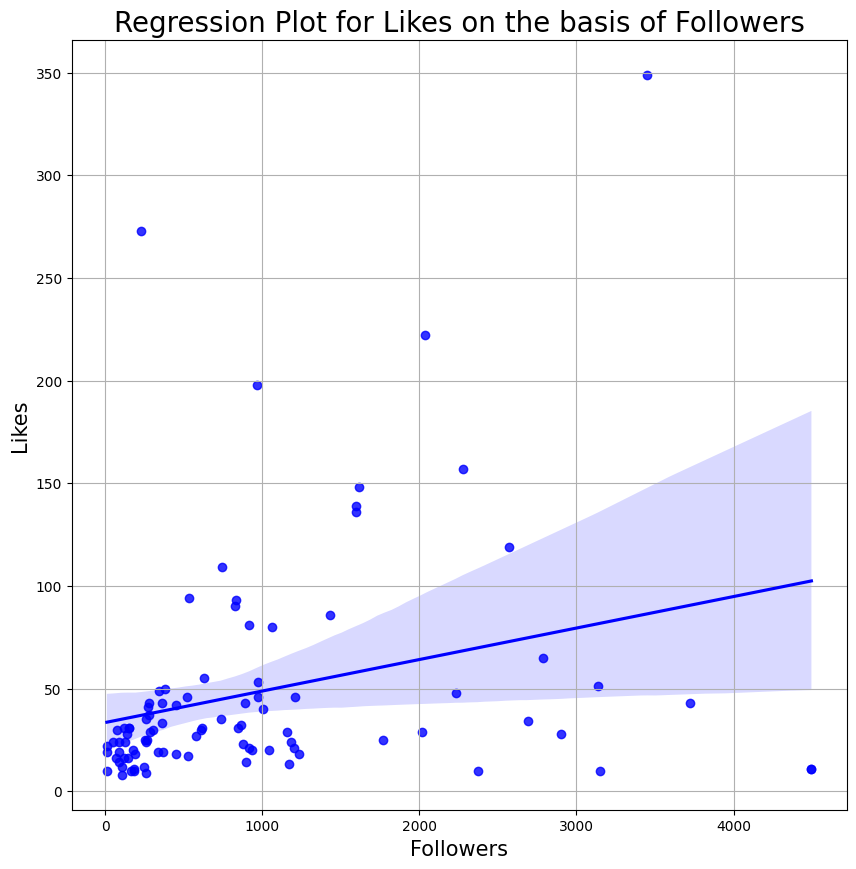

In [13]:
# Plot a regression line to visualize the relationship between Followers and Likes
plt.figure(figsize=(10,10))
sns.regplot(x='Followers', y='Likes', data=insta, color='blue')
plt.xlabel('Followers', size=15)
plt.ylabel('Likes', size=15)
plt.title('Regression Plot for Likes on the basis of Followers', size=20)
plt.grid()
plt.show()

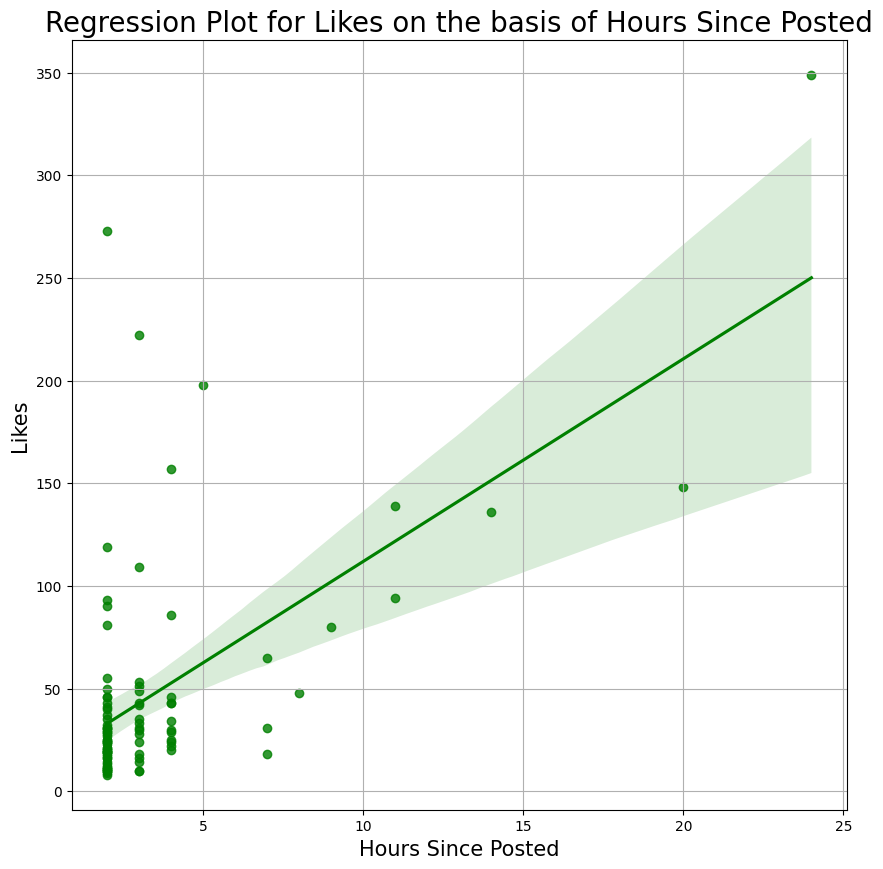

In [14]:
# Plot a regression line to show how Likes vary with time since the post was uploaded
plt.figure(figsize=(10,10))
sns.regplot(x='Hours Since Posted', y='Likes', data=insta, color='green')
plt.xlabel('Hours Since Posted', size=15)
plt.ylabel('Likes', size=15)
plt.title('Regression Plot for Likes on the basis of Hours Since Posted', size=20)
plt.grid()
plt.show()

In [15]:
# Generate and display a word cloud for a given text column, excluding common stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add('will')
stopwords.add('new')

def wordcloud(column):
    words = ''
    data = insta[column]
    for word in data:
        words = words + str(word)
        
    wc = WordCloud(width=800, height=800, stopwords=stopwords, min_font_size=15).generate(words)
    
    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title('Word Cloud of column ' + str(column), size=20)
    plt.show()

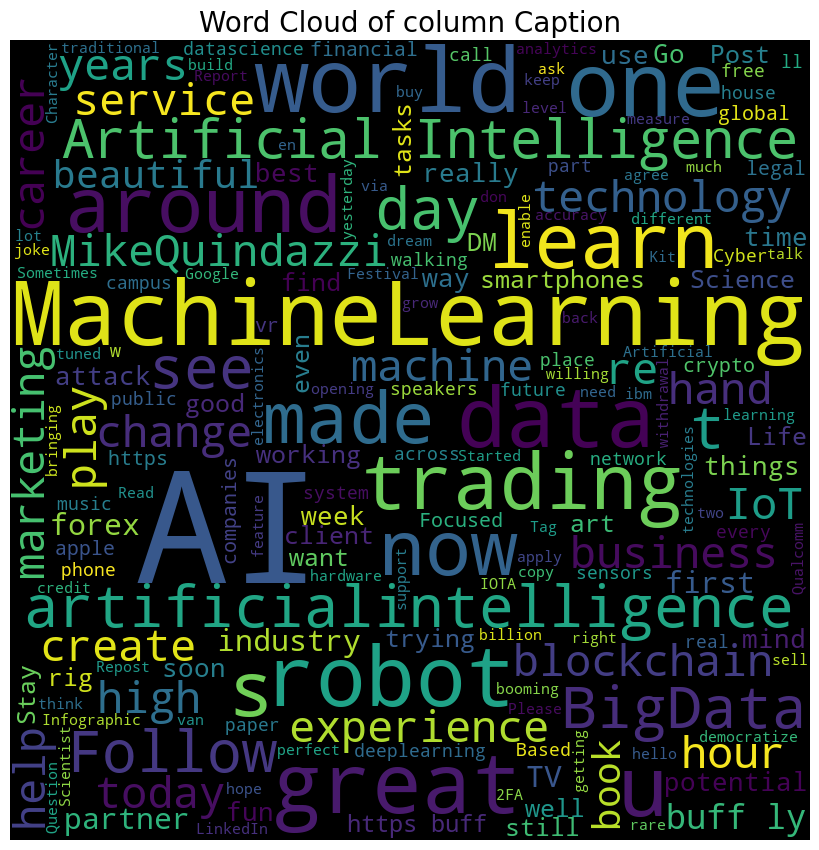

In [16]:
wordcloud('Caption')

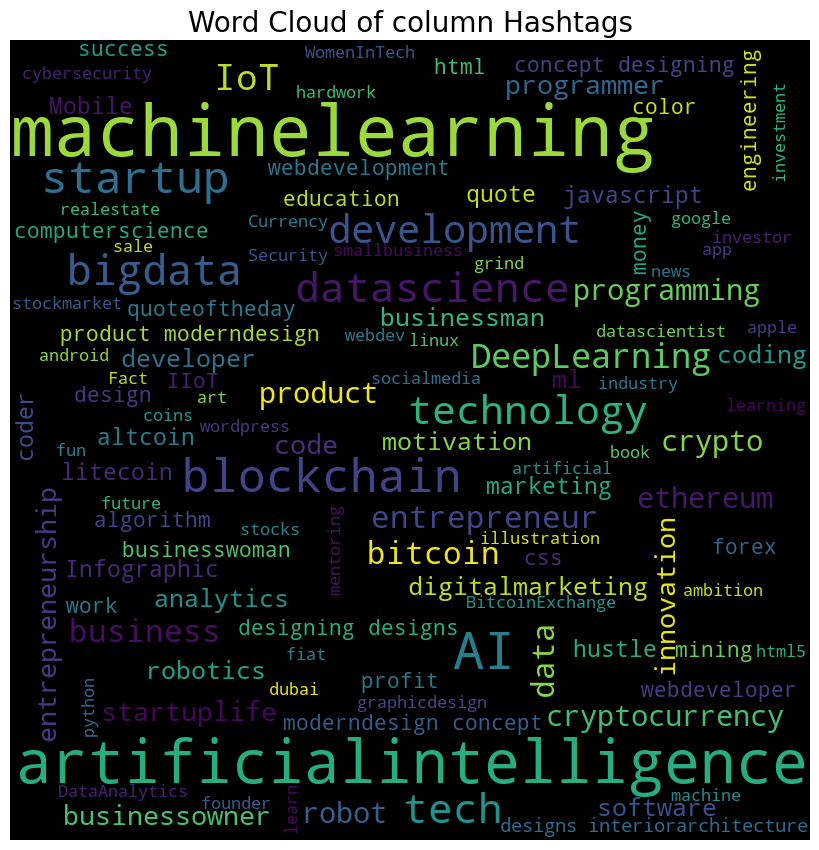

In [17]:
wordcloud('Hashtags')

In [18]:
insta = pd.get_dummies(insta)

In [19]:
features = insta.iloc[:,0:5]
target = insta['Likes']

In [20]:
# Split the dataset into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size = 0.3, random_state = 10)

In [21]:
# Standardize the feature values to have zero mean and unit variance

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#### Random Forest Regressor

In [22]:
# Train a Random Forest Regressor with a maximum depth of 3 on the training data
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=3)
rfr.fit(xtrain, ytrain)

,n_estimators,100
,criterion,'squared_error'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
pred = rfr.predict(xtest)
pred


array([200.68766667,  17.87099886,  45.74961776,  17.87099886,
        28.00746973,  18.82428281,  18.82428281,  17.87099886,
        18.36280686,  34.88712522, 143.69960714,  17.96677664,
        22.1023813 ,  17.87099886,  17.87099886,  27.22261171,
        44.21821341,  17.87099886,  42.68574611,  42.31111809,
        47.44665386,  18.82428281,  34.88712522,  23.4246479 ,
        18.82428281,  18.36280686,  23.4246479 ,  19.51309116,
        23.4246479 ])

In [24]:
metrics.r2_score(ytest, pred)

0.9191536435374226

#### Gradient Boosting Regressor

In [25]:
# Train a Gradient Boosting Regressor on the training data
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(xtrain, ytrain)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [26]:
ypred = gbr.predict(xtest)
ypred

array([221.94128439,  10.01884761,  47.9934913 ,  11.97833726,
        32.86697614,  19.06989522,  18.99723621,   9.05270229,
        15.99326017,  37.17504829, 138.99471797,  14.00448643,
        22.04861707,  11.98238008,  10.02838937,  28.28758609,
        45.98132623,  10.01669264,  43.04386838,  39.91841094,
        55.04596649,  19.06989522,  37.1146727 ,  23.98643141,
        17.99829976,  15.98135784,  24.06475547,  19.8891979 ,
        23.98643141])

In [27]:
metrics.r2_score(ytest, ypred)

0.9633239022392571

#### Linear Regression

In [28]:
# Train a Linear Regression model on the training data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
prediction = lr.predict(xtest)
prediction

array([273.,  10.,  49.,  13.,  34.,  19.,  19.,   8.,  16.,  35., 136.,
        14.,  23.,  12.,  10.,  28.,  46.,  10.,  43.,  41.,  65.,  19.,
        35.,  25.,  18.,  16.,  25.,  20.,  25.])

In [30]:
metrics.r2_score(ytest, prediction)

1.0

### We see that posts regarding artificial intelligence, machine learning, big data, trading, etc can help with better reach on Instagram. Although more followers give more number of likes, but as the time of the post increases, it gets a better reach. So, a clever use of hashtags according to the followers can account for a good reach of Instagram posts.